In [1]:
import numpy as np
import random
from heapq import nlargest
import matplotlib.pyplot as plt
from functions import *

In [2]:
k = 10
n_queens = 100
itter = 100000
hist = training(n_queens,k,selection_rate=k//2, cross_rate=3*(k//8), mutation_rate=k//8,
                temp=1,cooling=0.99,k_near=3,itteration=itter,repetition=1)

10: 
39
20: 
34
30: 
29
40: 
23
50: 
17
60: 
17
70: 
12
80: 
11
90: 
12
100: 
10
110: 
8
120: 
9
130: 
9
140: 
8
150: 
6
160: 
6
170: 
5
180: 
5
190: 
5
200: 
3
210: 
3
220: 
3
230: 
3
240: 
3
250: 
3
260: 
3
270: 
3
280: 
2
290: 
2
300: 
2
310: 
2
320: 
2
330: 
2
340: 
2
350: 
2
360: 
2
370: 
2
380: 
1
390: 
1
400: 
1
410: 
1
420: 
1


In [426]:
print(fittness(hist[0][-1]))
print(hist[0][-1])

0
[25, 33, 70, 46, 96, 40, 52, 58, 62, 20, 69, 51, 93, 42, 37, 99, 86, 39, 79, 13, 16, 63, 67, 5, 24, 22, 78, 0, 7, 9, 43, 91, 50, 19, 82, 66, 38, 61, 23, 32, 56, 18, 34, 84, 71, 75, 60, 45, 92, 11, 31, 88, 35, 14, 10, 2, 73, 6, 68, 87, 64, 27, 81, 97, 90, 72, 3, 41, 89, 21, 29, 12, 59, 76, 4, 28, 77, 55, 17, 1, 30, 44, 53, 47, 54, 80, 98, 95, 57, 94, 74, 26, 49, 65, 48, 83, 85, 15, 36, 8]


(<matplotlib.image.AxesImage at 0x222877e1280>, (-0.5, 99.5, 99.5, -0.5))

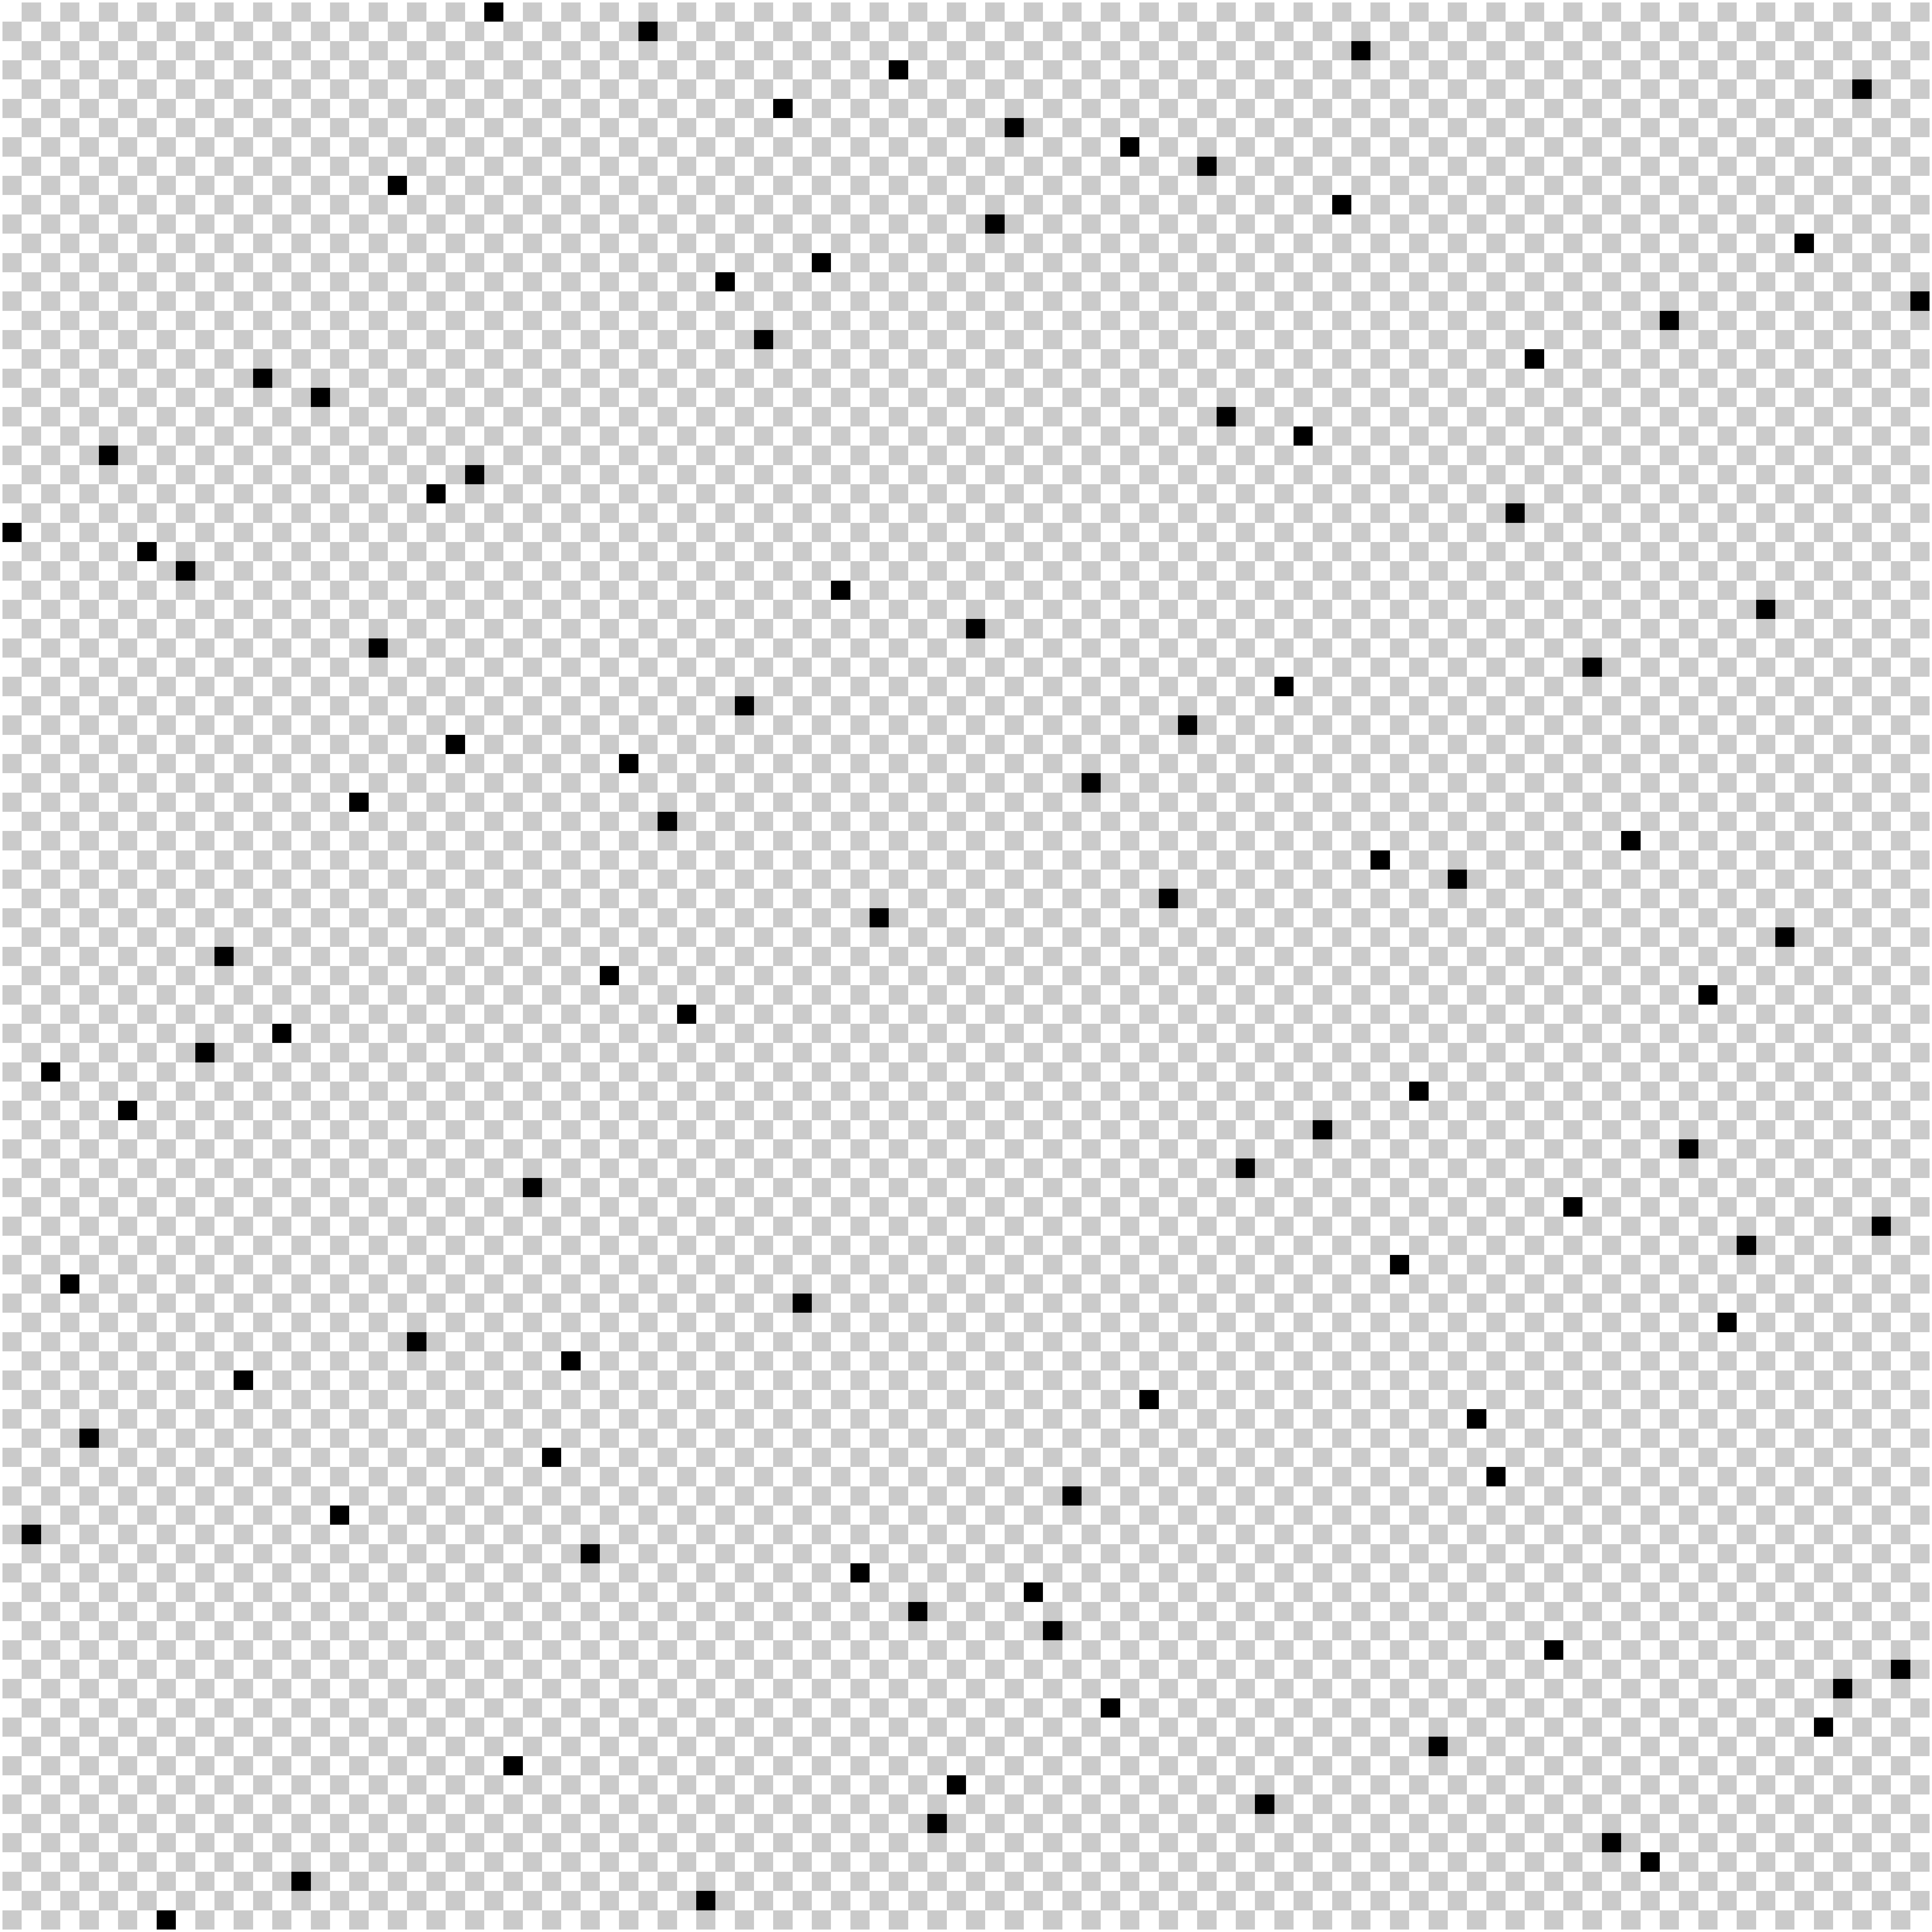

In [445]:
grid = visualizition(hist[0][-1],100)
grid = np.array(grid)
plt.figure(figsize=(100,100))
plt.imshow(grid, cmap='gray'), plt.axis('off')

In [456]:
k = 10
n_queens = 300
itter = 100000
hist_10 = training(n_queens,k,selection_rate=k//2, cross_rate=3*(k//8), mutation_rate=k//8,
                temp=1,cooling=0.99,k_near=3,itteration=itter,repetition=1)

10: 
133
20: 
125
30: 
116
40: 
110
50: 
102
60: 
94
70: 
89
80: 
80
90: 
76
100: 
71
110: 
66
120: 
62
130: 
59
140: 
56
150: 
53
160: 
51
170: 
49
180: 
47
190: 
45
200: 
43
210: 
39
220: 
36
230: 
34
240: 
32
250: 
31
260: 
31
270: 
30
280: 
28
290: 
24
300: 
24
310: 
23
320: 
22
330: 
22
340: 
21
350: 
19
360: 
18
370: 
18
380: 
16
390: 
16
400: 
16
410: 
15
420: 
15
430: 
15
440: 
13
450: 
12
460: 
11
470: 
10
480: 
10
490: 
10
500: 
9
510: 
8
520: 
7
530: 
6
540: 
5
550: 
5
560: 
5


<ipython-input-422-187b63970c05>:16: RuntimeWarning: overflow encountered in exp
  max_prob = np.exp(delta/temp)


570: 
5
580: 
5
590: 
5
600: 
5
610: 
4
620: 
3
630: 
3
640: 
3
650: 
3
660: 
3
670: 
3
680: 
3
690: 
3
700: 
3
710: 
3
720: 
3
730: 
3
740: 
3
750: 
2
760: 
2
770: 
1
780: 
1
790: 
1
800: 
1
810: 
1
820: 
1
830: 
1
840: 
1
850: 
1
860: 
1
870: 
1
880: 
1
890: 
1


In [455]:
print(fittness(hist_10[0][-1]))
print(hist_10[0][-1])

0
[214, 270, 227, 39, 181, 4, 288, 87, 198, 259, 184, 189, 263, 247, 96, 86, 84, 162, 159, 212, 113, 78, 53, 81, 85, 23, 210, 32, 275, 88, 143, 192, 160, 130, 111, 161, 208, 149, 186, 128, 171, 226, 177, 245, 273, 285, 254, 196, 244, 255, 62, 52, 139, 279, 200, 2, 216, 71, 110, 223, 63, 65, 277, 169, 282, 20, 14, 290, 40, 207, 251, 124, 21, 99, 16, 82, 11, 299, 267, 95, 90, 237, 204, 225, 138, 13, 243, 147, 239, 248, 123, 102, 60, 114, 231, 157, 168, 34, 24, 249, 199, 119, 217, 221, 295, 100, 133, 22, 193, 229, 140, 201, 151, 271, 67, 54, 105, 15, 6, 57, 1, 230, 213, 92, 101, 36, 170, 108, 61, 291, 257, 107, 3, 9, 127, 18, 232, 183, 17, 43, 287, 296, 274, 131, 238, 252, 41, 137, 55, 215, 109, 33, 74, 236, 29, 218, 10, 179, 122, 19, 68, 256, 154, 280, 93, 45, 132, 286, 268, 242, 83, 276, 206, 197, 191, 188, 70, 253, 103, 235, 205, 142, 26, 44, 219, 158, 129, 118, 289, 292, 8, 261, 175, 163, 269, 145, 59, 153, 246, 98, 298, 185, 64, 27, 38, 297, 173, 262, 50, 7, 294, 278, 148, 49, 135, 2

(<matplotlib.image.AxesImage at 0x2228766de50>, (-0.5, 299.5, 299.5, -0.5))

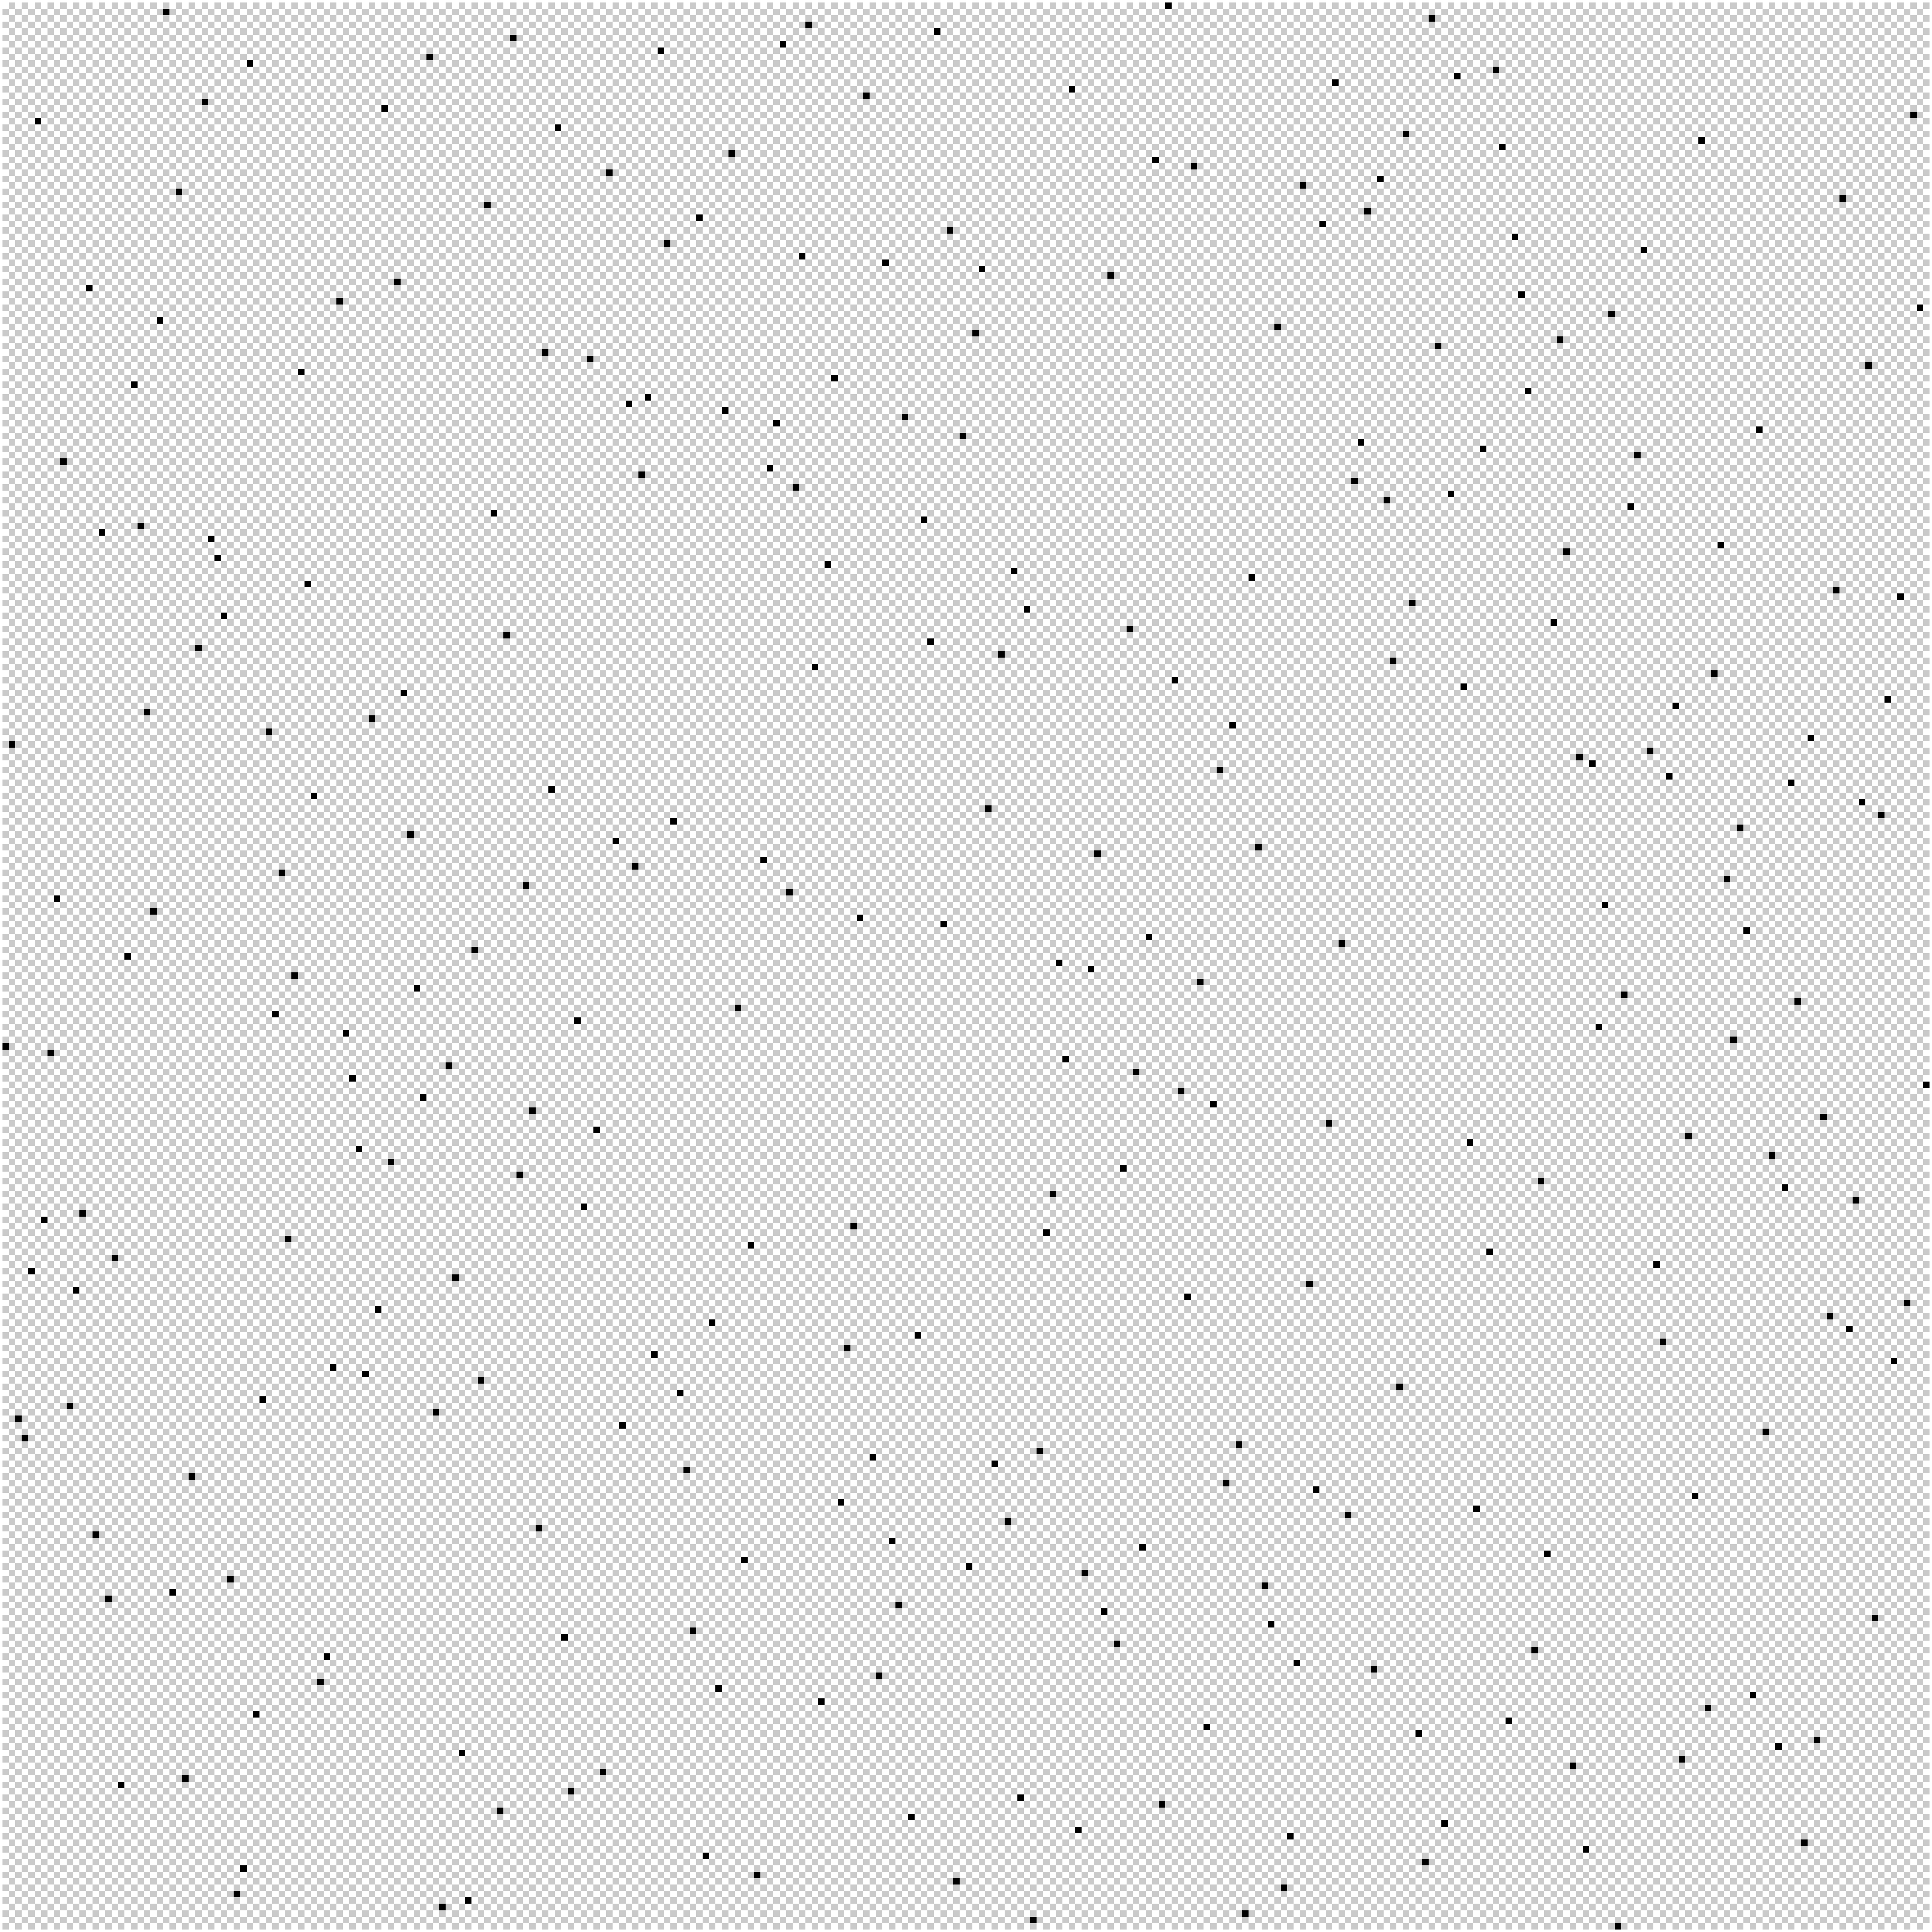

In [457]:
grid = visualizition(hist_10[0][-1],300)
grid = np.array(grid)
plt.figure(figsize=(100,100))
plt.imshow(grid, cmap='gray'), plt.axis('off')

In [459]:
k = 10
n_queens = 1000
itter = 1000000
hist_10 = training(n_queens,k,selection_rate=k//2, cross_rate=3*(k//8), mutation_rate=k//8,
                temp=1,cooling=0.99,k_near=3,itteration=itter,repetition=1)

10: 
487
20: 
475
30: 
455
40: 
448
50: 
437
60: 
427
70: 
420
80: 
407
90: 
400
100: 
385
110: 
377
120: 
371
130: 
363
140: 
356
150: 
348
160: 
339
170: 
332
180: 
324
190: 
321
200: 
313
210: 
303
220: 
298
230: 
293
240: 
287
250: 
283
260: 
275
270: 
269
280: 
264
290: 
256
300: 
253
310: 
246
320: 
245
330: 
242
340: 
236
350: 
231
360: 
226
370: 
222
380: 
219
390: 
215
400: 
210
410: 
206
420: 
203
430: 
198
440: 
196
450: 
193
460: 
189
470: 
187
480: 
183
490: 
181
500: 
177
510: 
174
520: 
173
530: 
170
540: 
166
550: 
166
560: 
164


<ipython-input-422-187b63970c05>:16: RuntimeWarning: overflow encountered in exp
  max_prob = np.exp(delta/temp)


570: 
159
580: 
155
590: 
155
600: 
152
610: 
150
620: 
147
630: 
147
640: 
145
650: 
142
660: 
140
670: 
135
680: 
134
690: 
132
700: 
131
710: 
126
720: 
124
730: 
122
740: 
121
750: 
119
760: 
117
770: 
114
780: 
113
790: 
109
800: 
106
810: 
104
820: 
104
830: 
102
840: 
101
850: 
98
860: 
98
870: 
97
880: 
95
890: 
95
900: 
95
910: 
93
920: 
92
930: 
90
940: 
88
950: 
86
960: 
84
970: 
83
980: 
82
990: 
79
1000: 
79
1010: 
79
1020: 
78
1030: 
77
1040: 
76
1050: 
75
1060: 
75
1070: 
73
1080: 
71
1090: 
71
1100: 
70
1110: 
69
1120: 
68
1130: 
68
1140: 
67
1150: 
67
1160: 
66
1170: 
66
1180: 
65
1190: 
65
1200: 
64
1210: 
62
1220: 
62
1230: 
61
1240: 
61
1250: 
60
1260: 
59
1270: 
59
1280: 
58
1290: 
58
1300: 
57
1310: 
55
1320: 
55
1330: 
54
1340: 
53
1350: 
53
1360: 
53
1370: 
52
1380: 
50
1390: 
49
1400: 
49
1410: 
49
1420: 
47
1430: 
47
1440: 
46
1450: 
46
1460: 
45
1470: 
45
1480: 
45
1490: 
45
1500: 
44
1510: 
44
1520: 
43
1530: 
41
1540: 
40
1550: 
38
1560: 
38
1570: 
37
1580:

In [460]:
print(fittness(hist_10[0][-1]))
print(hist_10[0][-1])

0
[442, 364, 861, 872, 800, 356, 109, 670, 20, 396, 592, 168, 807, 557, 951, 321, 539, 639, 862, 994, 246, 194, 105, 924, 744, 626, 682, 404, 434, 597, 455, 222, 809, 403, 652, 707, 87, 474, 184, 447, 166, 766, 42, 582, 765, 694, 754, 487, 622, 737, 460, 860, 999, 523, 929, 453, 687, 488, 199, 373, 928, 376, 688, 870, 393, 788, 529, 44, 923, 525, 562, 380, 618, 767, 359, 240, 572, 706, 193, 700, 350, 889, 379, 390, 560, 813, 932, 352, 480, 596, 646, 654, 669, 409, 175, 219, 632, 949, 406, 90, 267, 48, 173, 577, 260, 494, 280, 745, 252, 213, 982, 39, 228, 526, 799, 374, 358, 665, 463, 192, 650, 894, 275, 538, 578, 509, 574, 27, 310, 881, 915, 141, 552, 45, 782, 621, 311, 791, 606, 825, 180, 412, 63, 227, 224, 721, 736, 708, 258, 292, 658, 691, 182, 270, 371, 755, 950, 391, 479, 128, 389, 253, 68, 411, 18, 842, 104, 634, 368, 495, 816, 567, 117, 328, 234, 400, 208, 769, 820, 884, 568, 640, 666, 792, 528, 778, 60, 309, 256, 276, 625, 692, 641, 996, 71, 200, 912, 940, 789, 419, 718, 34, 43

(<matplotlib.image.AxesImage at 0x2228775a820>, (-0.5, 999.5, 999.5, -0.5))

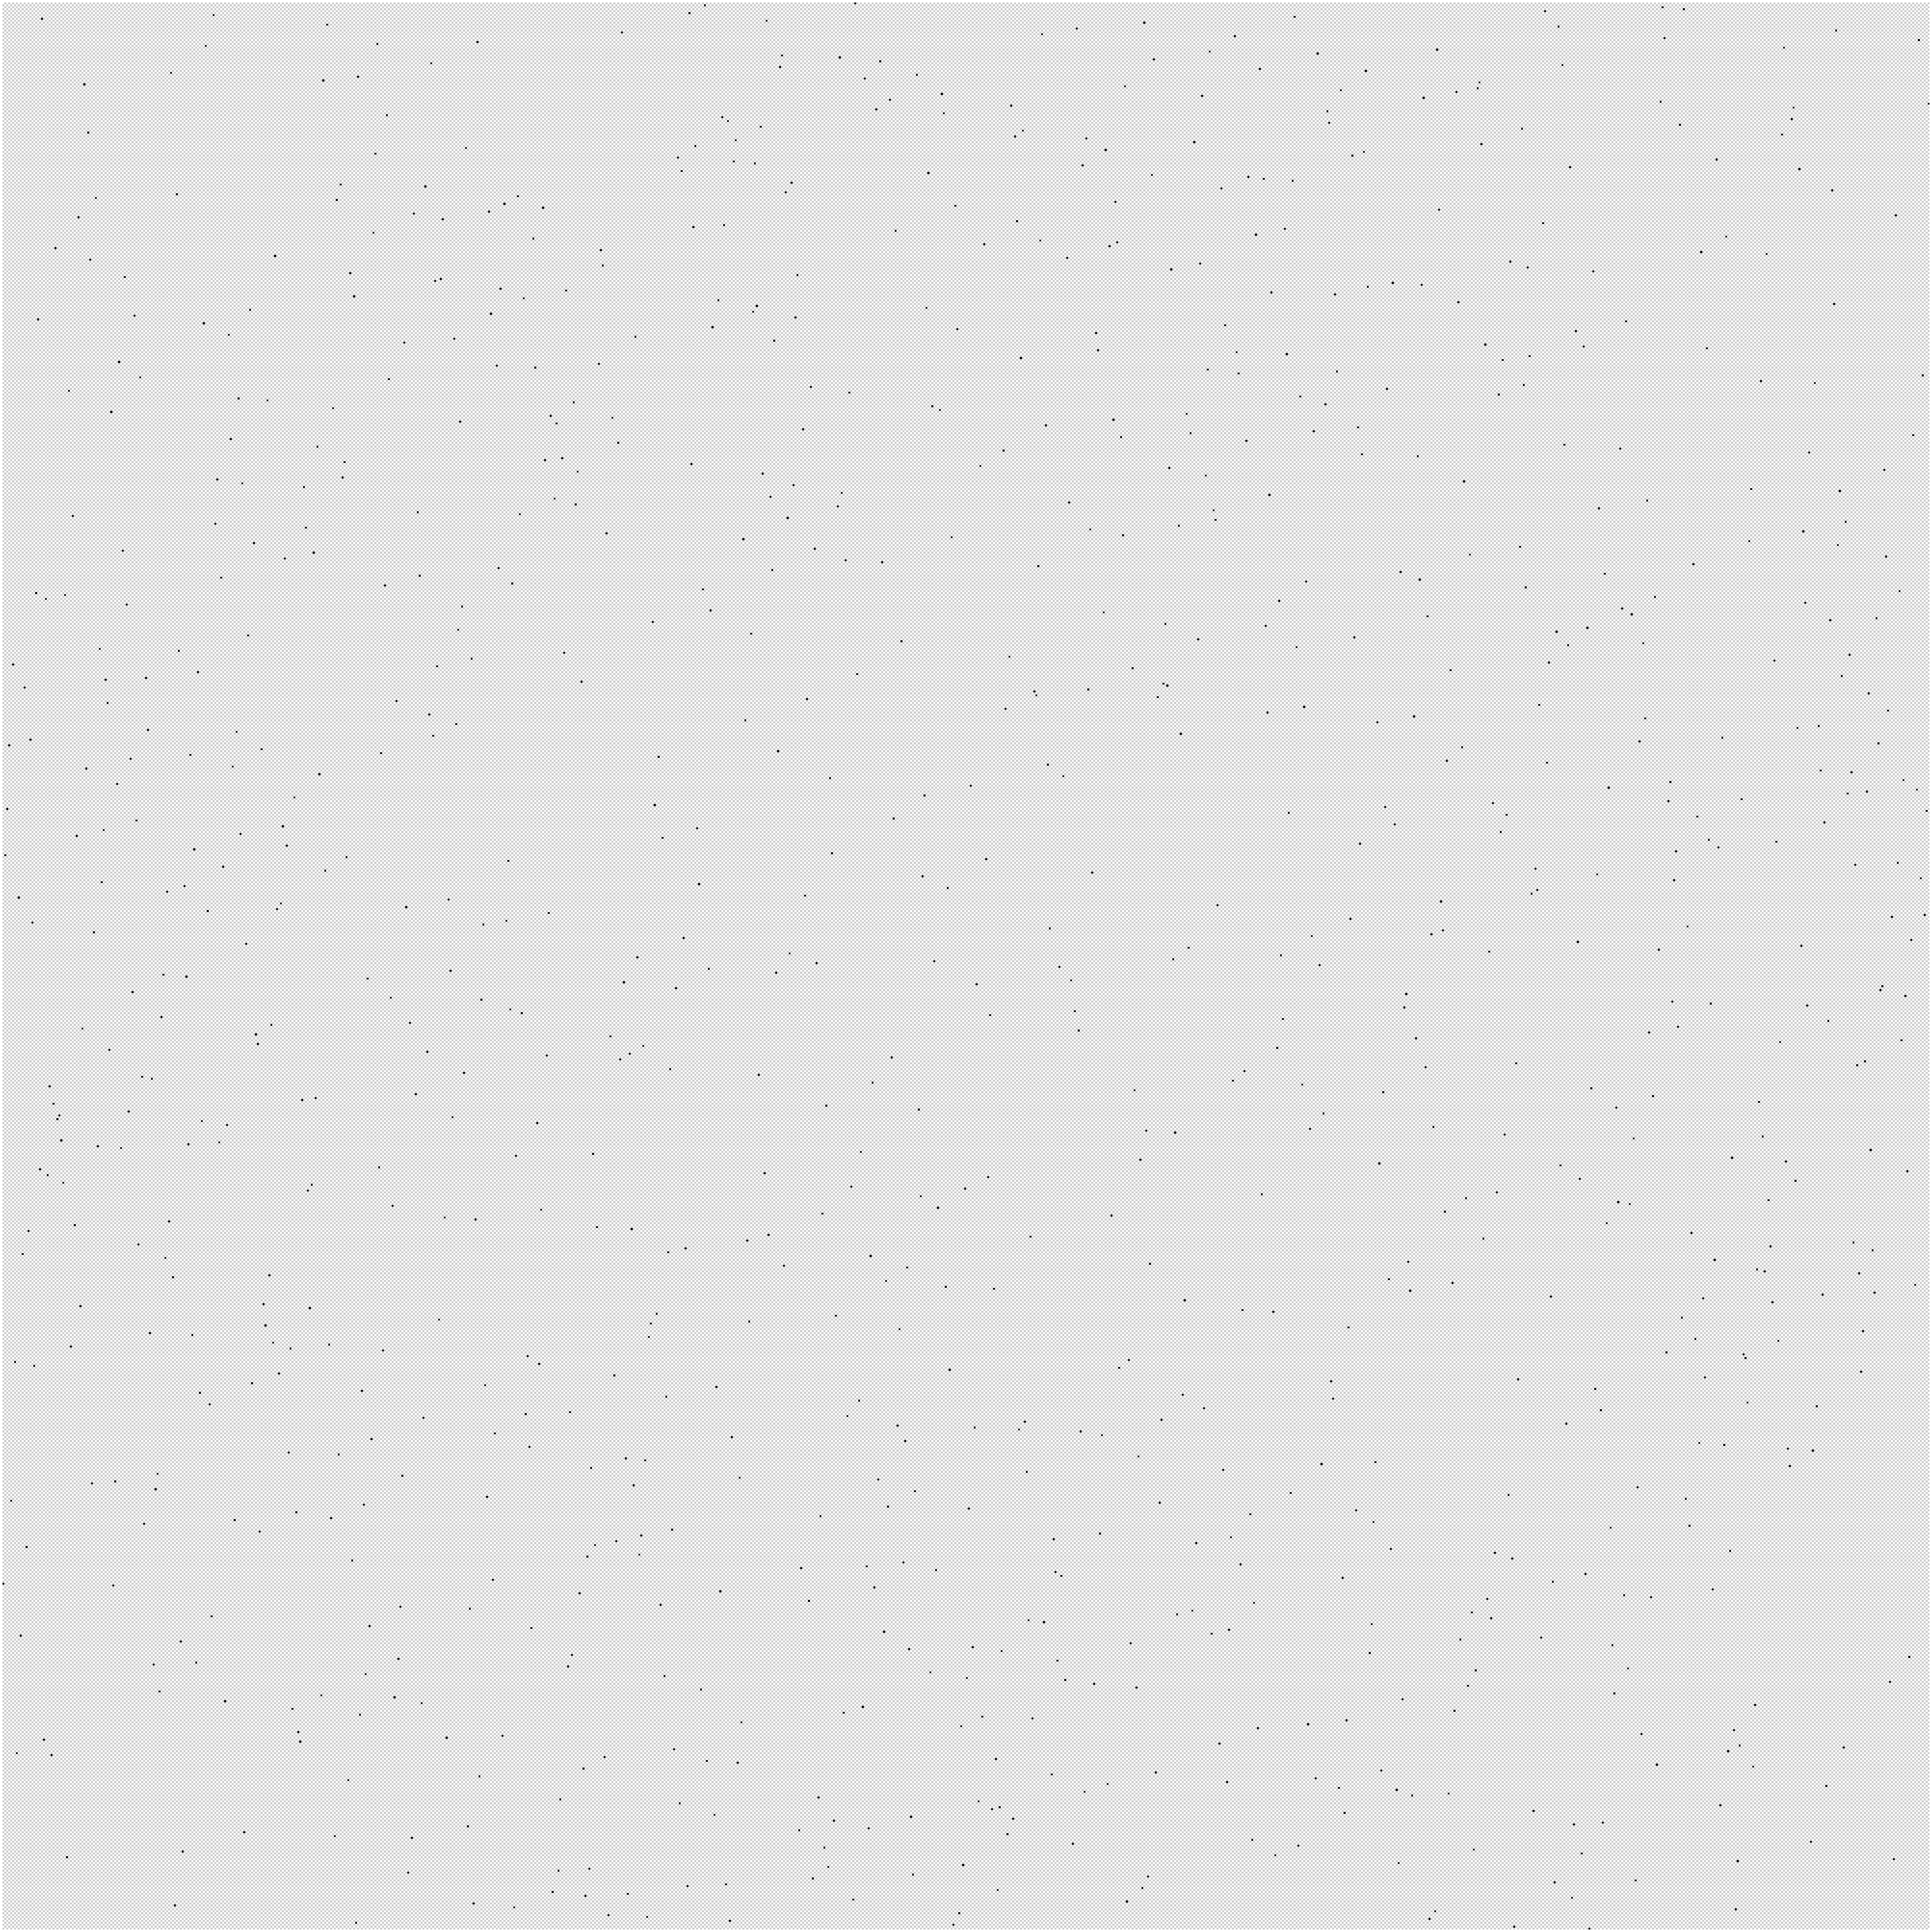

In [461]:
grid = visualizition(hist_10[0][-1],1000)
grid = np.array(grid)
plt.figure(figsize=(100,100))
plt.imshow(grid, cmap='gray'), plt.axis('off')

In [468]:
k = 4
n_queens = 2000
itter = 1000000
hist_10 = training(n_queens,k,selection_rate=k//2, cross_rate=3*(k//8), mutation_rate=k//8,
                temp=2,cooling=0.999,k_near=1,itteration=itter,repetition=1)

10: 
1023
20: 
1012
30: 
1011
40: 
1009
50: 
1002
60: 
996
70: 
990
80: 
994
90: 
992
100: 
993
110: 
988
120: 
987
130: 
986
140: 
984
150: 
980
160: 
983
170: 
983
180: 
979
190: 
975
200: 
977
210: 
973
220: 
973
230: 
964
240: 
957
250: 
955
260: 
953
270: 
951
280: 
946
290: 
942
300: 
941
310: 
939
320: 
935
330: 
931
340: 
937
350: 
939
360: 
934
370: 
927
380: 
928
390: 
927
400: 
926
410: 
926
420: 
923
430: 
923
440: 
922
450: 
921
460: 
917
470: 
921
480: 
917
490: 
914
500: 
910
510: 
907
520: 
908
530: 
909
540: 
908
550: 
904
560: 
903
570: 
897
580: 
896
590: 
894
600: 
889
610: 
883
620: 
879
630: 
876
640: 
873
650: 
872
660: 
872
670: 
868
680: 
871
690: 
865
700: 
864
710: 
858
720: 
857
730: 
857
740: 
855
750: 
853
760: 
849
770: 
845
780: 
844
790: 
841
800: 
836
810: 
831
820: 
826
830: 
820
840: 
818
850: 
820
860: 
816
870: 
814
880: 
809
890: 
805
900: 
802
910: 
804
920: 
798
930: 
800
940: 
798
950: 
796
960: 
793
970: 
792
980: 
792
990: 
788
1000: 
786
101

<ipython-input-422-187b63970c05>:16: RuntimeWarning: overflow encountered in exp
  max_prob = np.exp(delta/temp)


7030: 
202
7040: 
202
7050: 
202
7060: 
202
7070: 
202
7080: 
202
7090: 
202
7100: 
202
7110: 
202
7120: 
202
7130: 
202
7140: 
200
7150: 
199
7160: 
198
7170: 
198
7180: 
198
7190: 
196
7200: 
196
7210: 
196
7220: 
196
7230: 
196
7240: 
196
7250: 
194
7260: 
193
7270: 
193
7280: 
192
7290: 
191
7300: 
191
7310: 
191
7320: 
191
7330: 
191
7340: 
191
7350: 
191
7360: 
191
7370: 
191
7380: 
191
7390: 
189
7400: 
189
7410: 
189
7420: 
189
7430: 
189
7440: 
189
7450: 
189
7460: 
189
7470: 
189
7480: 
188
7490: 
187
7500: 
187
7510: 
186
7520: 
186
7530: 
185
7540: 
185
7550: 
185
7560: 
185
7570: 
185
7580: 
185
7590: 
185
7600: 
185
7610: 
185
7620: 
185
7630: 
185
7640: 
185
7650: 
185
7660: 
185
7670: 
185
7680: 
185
7690: 
185
7700: 
185
7710: 
184
7720: 
184
7730: 
184
7740: 
184
7750: 
184
7760: 
184
7770: 
184
7780: 
184
7790: 
184
7800: 
182
7810: 
182
7820: 
182
7830: 
182
7840: 
182
7850: 
182
7860: 
182
7870: 
181
7880: 
181
7890: 
181
7900: 
180
7910: 
180
7920: 
180
7930: 
179

14110: 
106
14120: 
106
14130: 
106
14140: 
106
14150: 
106
14160: 
106
14170: 
106
14180: 
106
14190: 
106
14200: 
106
14210: 
106
14220: 
106
14230: 
106
14240: 
106
14250: 
106
14260: 
106
14270: 
106
14280: 
106
14290: 
105
14300: 
105
14310: 
104
14320: 
104
14330: 
104
14340: 
104
14350: 
104
14360: 
104
14370: 
104
14380: 
104
14390: 
104
14400: 
104
14410: 
104
14420: 
104
14430: 
103
14440: 
103
14450: 
103
14460: 
103
14470: 
103
14480: 
103
14490: 
103
14500: 
103
14510: 
103
14520: 
103
14530: 
102
14540: 
102
14550: 
102
14560: 
102
14570: 
102
14580: 
100
14590: 
100
14600: 
100
14610: 
100
14620: 
100
14630: 
100
14640: 
99
14650: 
99
14660: 
99
14670: 
99
14680: 
99
14690: 
99
14700: 
99
14710: 
99
14720: 
99
14730: 
99
14740: 
99
14750: 
99
14760: 
99
14770: 
99
14780: 
99
14790: 
99
14800: 
98
14810: 
98
14820: 
97
14830: 
96
14840: 
96
14850: 
95
14860: 
95
14870: 
95
14880: 
95
14890: 
95
14900: 
95
14910: 
95
14920: 
95
14930: 
95
14940: 
95
14950: 
95
14960: 
95
1

21510: 
58
21520: 
58
21530: 
58
21540: 
58
21550: 
58
21560: 
58
21570: 
57
21580: 
57
21590: 
57
21600: 
57
21610: 
57
21620: 
57
21630: 
57
21640: 
57
21650: 
57
21660: 
57
21670: 
56
21680: 
56
21690: 
56
21700: 
56
21710: 
56
21720: 
56
21730: 
56
21740: 
56
21750: 
56
21760: 
56
21770: 
56
21780: 
56
21790: 
56
21800: 
56
21810: 
56
21820: 
56
21830: 
56
21840: 
56
21850: 
56
21860: 
56
21870: 
56
21880: 
56
21890: 
56
21900: 
56
21910: 
56
21920: 
56
21930: 
56
21940: 
56
21950: 
56
21960: 
56
21970: 
56
21980: 
56
21990: 
56
22000: 
56
22010: 
56
22020: 
56
22030: 
56
22040: 
56
22050: 
56
22060: 
56
22070: 
56
22080: 
56
22090: 
56
22100: 
56
22110: 
56
22120: 
56
22130: 
56
22140: 
56
22150: 
56
22160: 
56
22170: 
56
22180: 
56
22190: 
56
22200: 
56
22210: 
56
22220: 
56
22230: 
56
22240: 
56
22250: 
56
22260: 
56
22270: 
56
22280: 
56
22290: 
56
22300: 
56
22310: 
56
22320: 
56
22330: 
56
22340: 
56
22350: 
56
22360: 
56
22370: 
56
22380: 
56
22390: 
56
22400: 
56
22410: 
56

28960: 
41
28970: 
41
28980: 
41
28990: 
41
29000: 
41
29010: 
41
29020: 
41
29030: 
41
29040: 
41
29050: 
41
29060: 
41
29070: 
41
29080: 
41
29090: 
41
29100: 
41
29110: 
41
29120: 
41
29130: 
41
29140: 
41
29150: 
41
29160: 
41
29170: 
41
29180: 
41
29190: 
41
29200: 
41
29210: 
41
29220: 
41
29230: 
41
29240: 
41
29250: 
41
29260: 
41
29270: 
41
29280: 
41
29290: 
41
29300: 
41
29310: 
41
29320: 
41
29330: 
41
29340: 
41
29350: 
41
29360: 
41
29370: 
41
29380: 
41
29390: 
41
29400: 
41
29410: 
41
29420: 
41
29430: 
41
29440: 
41
29450: 
40
29460: 
40
29470: 
40
29480: 
40
29490: 
40
29500: 
40
29510: 
40
29520: 
40
29530: 
40
29540: 
40
29550: 
40
29560: 
40
29570: 
40
29580: 
40
29590: 
40
29600: 
40
29610: 
40
29620: 
40
29630: 
40
29640: 
40
29650: 
40
29660: 
40
29670: 
40
29680: 
40
29690: 
40
29700: 
40
29710: 
40
29720: 
40
29730: 
40
29740: 
40
29750: 
40
29760: 
40
29770: 
40
29780: 
40
29790: 
40
29800: 
40
29810: 
40
29820: 
40
29830: 
40
29840: 
40
29850: 
40
29860: 
40

36410: 
29
36420: 
29
36430: 
29
36440: 
29
36450: 
29
36460: 
29
36470: 
29
36480: 
29
36490: 
29
36500: 
29
36510: 
29
36520: 
29
36530: 
29
36540: 
29
36550: 
29
36560: 
29
36570: 
29
36580: 
29
36590: 
29
36600: 
29
36610: 
29
36620: 
29
36630: 
28
36640: 
28
36650: 
28
36660: 
28
36670: 
28
36680: 
28
36690: 
28
36700: 
28
36710: 
27
36720: 
27
36730: 
27
36740: 
27
36750: 
27
36760: 
27
36770: 
27
36780: 
27
36790: 
27
36800: 
27
36810: 
27
36820: 
27
36830: 
27
36840: 
27
36850: 
27
36860: 
27
36870: 
27
36880: 
27
36890: 
27
36900: 
27
36910: 
27
36920: 
27
36930: 
27
36940: 
27
36950: 
27
36960: 
27
36970: 
27
36980: 
27
36990: 
27
37000: 
27
37010: 
27
37020: 
27
37030: 
27
37040: 
27
37050: 
27
37060: 
27
37070: 
27
37080: 
27
37090: 
27
37100: 
27
37110: 
27
37120: 
27
37130: 
27
37140: 
27
37150: 
27
37160: 
27
37170: 
27
37180: 
27
37190: 
27
37200: 
27
37210: 
27
37220: 
27
37230: 
27
37240: 
27
37250: 
27
37260: 
27
37270: 
27
37280: 
27
37290: 
27
37300: 
27
37310: 
27

43860: 
20
43870: 
20
43880: 
20
43890: 
20
43900: 
20
43910: 
20
43920: 
20
43930: 
20
43940: 
20
43950: 
20
43960: 
20
43970: 
20
43980: 
20
43990: 
20
44000: 
20
44010: 
20
44020: 
20
44030: 
20
44040: 
20
44050: 
20
44060: 
20
44070: 
20
44080: 
20
44090: 
20
44100: 
20
44110: 
20
44120: 
20
44130: 
20
44140: 
20
44150: 
20
44160: 
20
44170: 
20
44180: 
20
44190: 
20
44200: 
20
44210: 
20
44220: 
20
44230: 
20
44240: 
20
44250: 
20
44260: 
20
44270: 
20
44280: 
20
44290: 
20
44300: 
20
44310: 
20
44320: 
20
44330: 
20
44340: 
20
44350: 
20
44360: 
20
44370: 
20
44380: 
20
44390: 
20
44400: 
20
44410: 
20
44420: 
20
44430: 
20
44440: 
20
44450: 
20
44460: 
20
44470: 
19
44480: 
19
44490: 
19
44500: 
19
44510: 
19
44520: 
19
44530: 
19
44540: 
19
44550: 
19
44560: 
19
44570: 
19
44580: 
19
44590: 
19
44600: 
19
44610: 
19
44620: 
19
44630: 
19
44640: 
19
44650: 
19
44660: 
19
44670: 
19
44680: 
19
44690: 
19
44700: 
19
44710: 
19
44720: 
19
44730: 
19
44740: 
19
44750: 
19
44760: 
19

51310: 
13
51320: 
13
51330: 
13
51340: 
13
51350: 
13
51360: 
13
51370: 
13
51380: 
13
51390: 
13
51400: 
13
51410: 
13
51420: 
13
51430: 
13
51440: 
13
51450: 
13
51460: 
13
51470: 
13
51480: 
13
51490: 
13
51500: 
13
51510: 
13
51520: 
13
51530: 
13
51540: 
13
51550: 
13
51560: 
13
51570: 
13
51580: 
13
51590: 
13
51600: 
13
51610: 
13
51620: 
13
51630: 
13
51640: 
13
51650: 
13
51660: 
13
51670: 
13
51680: 
13
51690: 
13
51700: 
13
51710: 
13
51720: 
13
51730: 
13
51740: 
13
51750: 
13
51760: 
13
51770: 
13
51780: 
13
51790: 
13
51800: 
13
51810: 
13
51820: 
13
51830: 
13
51840: 
13
51850: 
13
51860: 
13
51870: 
13
51880: 
13
51890: 
13
51900: 
13
51910: 
13
51920: 
13
51930: 
13
51940: 
13
51950: 
13
51960: 
13
51970: 
13
51980: 
13
51990: 
13
52000: 
13
52010: 
13
52020: 
13
52030: 
13
52040: 
13
52050: 
13
52060: 
13
52070: 
13
52080: 
13
52090: 
13
52100: 
13
52110: 
13
52120: 
13
52130: 
13
52140: 
13
52150: 
13
52160: 
13
52170: 
13
52180: 
13
52190: 
13
52200: 
13
52210: 
13

58760: 
12
58770: 
12
58780: 
12
58790: 
12
58800: 
12
58810: 
12
58820: 
12
58830: 
12
58840: 
12
58850: 
12
58860: 
12
58870: 
12
58880: 
12
58890: 
12
58900: 
12
58910: 
12
58920: 
12
58930: 
12
58940: 
12
58950: 
12
58960: 
12
58970: 
12
58980: 
12
58990: 
12
59000: 
12
59010: 
12
59020: 
12
59030: 
12
59040: 
12
59050: 
12
59060: 
12
59070: 
12
59080: 
12
59090: 
12
59100: 
12
59110: 
12
59120: 
12
59130: 
12
59140: 
12
59150: 
12
59160: 
12
59170: 
12
59180: 
12
59190: 
12
59200: 
12
59210: 
12
59220: 
12
59230: 
12
59240: 
12
59250: 
12
59260: 
12
59270: 
12
59280: 
12
59290: 
12
59300: 
12
59310: 
12
59320: 
12
59330: 
12
59340: 
12
59350: 
12
59360: 
12
59370: 
12
59380: 
12
59390: 
12
59400: 
12
59410: 
12
59420: 
12
59430: 
12
59440: 
12
59450: 
12
59460: 
12
59470: 
12
59480: 
12
59490: 
12
59500: 
12
59510: 
12
59520: 
12
59530: 
12
59540: 
12
59550: 
12
59560: 
12
59570: 
12
59580: 
12
59590: 
12
59600: 
12
59610: 
12
59620: 
12
59630: 
12
59640: 
12
59650: 
12
59660: 
12

66210: 
10
66220: 
10
66230: 
10
66240: 
10
66250: 
10
66260: 
10
66270: 
10
66280: 
10
66290: 
10
66300: 
10
66310: 
10
66320: 
10
66330: 
10
66340: 
10
66350: 
10
66360: 
10
66370: 
10
66380: 
10
66390: 
10
66400: 
10
66410: 
10
66420: 
10
66430: 
10
66440: 
10
66450: 
10
66460: 
10
66470: 
10
66480: 
10
66490: 
10
66500: 
10
66510: 
10
66520: 
10
66530: 
10
66540: 
10
66550: 
10
66560: 
10
66570: 
10
66580: 
10
66590: 
10
66600: 
10
66610: 
10
66620: 
10
66630: 
10
66640: 
10
66650: 
10
66660: 
10
66670: 
10
66680: 
10
66690: 
10
66700: 
10
66710: 
10
66720: 
10
66730: 
10
66740: 
10
66750: 
10
66760: 
10
66770: 
10
66780: 
10
66790: 
10
66800: 
10
66810: 
10
66820: 
10
66830: 
10
66840: 
10
66850: 
10
66860: 
10
66870: 
10
66880: 
10
66890: 
10
66900: 
10
66910: 
10
66920: 
10
66930: 
10
66940: 
10
66950: 
10
66960: 
10
66970: 
10
66980: 
10
66990: 
10
67000: 
10
67010: 
10
67020: 
10
67030: 
10
67040: 
10
67050: 
10
67060: 
10
67070: 
10
67080: 
10
67090: 
10
67100: 
10
67110: 
10

73770: 
9
73780: 
9
73790: 
9
73800: 
9
73810: 
9
73820: 
9
73830: 
9
73840: 
9
73850: 
9
73860: 
9
73870: 
9
73880: 
9
73890: 
9
73900: 
9
73910: 
9
73920: 
9
73930: 
9
73940: 
9
73950: 
9
73960: 
9
73970: 
9
73980: 
9
73990: 
9
74000: 
9
74010: 
9
74020: 
9
74030: 
9
74040: 
9
74050: 
9
74060: 
9
74070: 
9
74080: 
9
74090: 
9
74100: 
9
74110: 
9
74120: 
9
74130: 
9
74140: 
9
74150: 
9
74160: 
9
74170: 
9
74180: 
9
74190: 
9
74200: 
9
74210: 
9
74220: 
9
74230: 
9
74240: 
9
74250: 
9
74260: 
9
74270: 
9
74280: 
9
74290: 
9
74300: 
9
74310: 
9
74320: 
9
74330: 
9
74340: 
9
74350: 
9
74360: 
9
74370: 
9
74380: 
9
74390: 
9
74400: 
9
74410: 
9
74420: 
9
74430: 
9
74440: 
9
74450: 
9
74460: 
9
74470: 
9
74480: 
9
74490: 
9
74500: 
9
74510: 
9
74520: 
9
74530: 
9
74540: 
9
74550: 
9
74560: 
9
74570: 
9
74580: 
9
74590: 
9
74600: 
9
74610: 
9
74620: 
9
74630: 
9
74640: 
9
74650: 
9
74660: 
9
74670: 
9
74680: 
9
74690: 
9
74700: 
9
74710: 
9
74720: 
9
74730: 
9
74740: 
9
74750: 
9
74760: 
9


81970: 
8
81980: 
8
81990: 
8
82000: 
8
82010: 
8
82020: 
8
82030: 
8
82040: 
8
82050: 
8
82060: 
8
82070: 
8
82080: 
8
82090: 
8
82100: 
8
82110: 
8
82120: 
8
82130: 
8
82140: 
8
82150: 
8
82160: 
8
82170: 
8
82180: 
8
82190: 
8
82200: 
8
82210: 
8
82220: 
8
82230: 
8
82240: 
8
82250: 
8
82260: 
8
82270: 
8
82280: 
8
82290: 
8
82300: 
8
82310: 
8
82320: 
8
82330: 
8
82340: 
8
82350: 
8
82360: 
8
82370: 
8
82380: 
8
82390: 
8
82400: 
8
82410: 
8
82420: 
8
82430: 
8
82440: 
8
82450: 
8
82460: 
8
82470: 
8
82480: 
8
82490: 
8
82500: 
8
82510: 
8
82520: 
8
82530: 
8
82540: 
8
82550: 
8
82560: 
8
82570: 
8
82580: 
8
82590: 
8
82600: 
8
82610: 
8
82620: 
8
82630: 
8
82640: 
8
82650: 
8
82660: 
8
82670: 
8
82680: 
8
82690: 
8
82700: 
8
82710: 
8
82720: 
8
82730: 
8
82740: 
8
82750: 
8
82760: 
8
82770: 
8
82780: 
8
82790: 
8
82800: 
8
82810: 
8
82820: 
8
82830: 
8
82840: 
8
82850: 
8
82860: 
8
82870: 
8
82880: 
8
82890: 
8
82900: 
8
82910: 
8
82920: 
8
82930: 
8
82940: 
8
82950: 
8
82960: 
8


90170: 
6
90180: 
6
90190: 
6
90200: 
6
90210: 
6
90220: 
6
90230: 
6
90240: 
6
90250: 
6
90260: 
6
90270: 
6
90280: 
6
90290: 
6
90300: 
6
90310: 
6
90320: 
6
90330: 
6
90340: 
6
90350: 
6
90360: 
6
90370: 
6
90380: 
6
90390: 
6
90400: 
6
90410: 
6
90420: 
6
90430: 
6
90440: 
6
90450: 
6
90460: 
6
90470: 
6
90480: 
6
90490: 
6
90500: 
6
90510: 
6
90520: 
6
90530: 
6
90540: 
6
90550: 
6
90560: 
6
90570: 
6
90580: 
6
90590: 
6
90600: 
6
90610: 
6
90620: 
6
90630: 
6
90640: 
6
90650: 
6
90660: 
6
90670: 
6
90680: 
6
90690: 
6
90700: 
6
90710: 
6
90720: 
6
90730: 
6
90740: 
6
90750: 
6
90760: 
6
90770: 
6
90780: 
6
90790: 
6
90800: 
6
90810: 
6
90820: 
6
90830: 
6
90840: 
6
90850: 
6
90860: 
6
90870: 
6
90880: 
6
90890: 
5
90900: 
5
90910: 
5
90920: 
5
90930: 
5
90940: 
5
90950: 
5
90960: 
5
90970: 
5
90980: 
5
90990: 
5
91000: 
5
91010: 
5
91020: 
5
91030: 
5
91040: 
5
91050: 
5
91060: 
5
91070: 
5
91080: 
5
91090: 
5
91100: 
5
91110: 
5
91120: 
5
91130: 
5
91140: 
5
91150: 
5
91160: 
5


98390: 
4
98400: 
4
98410: 
4
98420: 
4
98430: 
4
98440: 
4
98450: 
4
98460: 
4
98470: 
4
98480: 
4
98490: 
4
98500: 
4
98510: 
4
98520: 
4
98530: 
4
98540: 
4
98550: 
4
98560: 
4
98570: 
4
98580: 
4
98590: 
4
98600: 
4
98610: 
4
98620: 
4
98630: 
4
98640: 
4
98650: 
4
98660: 
4
98670: 
4
98680: 
4
98690: 
4
98700: 
4
98710: 
4
98720: 
4
98730: 
4
98740: 
4
98750: 
4
98760: 
4
98770: 
4
98780: 
4
98790: 
4
98800: 
4
98810: 
4
98820: 
4
98830: 
4
98840: 
4
98850: 
4
98860: 
4
98870: 
4
98880: 
4
98890: 
4
98900: 
4
98910: 
4
98920: 
4
98930: 
4
98940: 
4
98950: 
4
98960: 
4
98970: 
4
98980: 
4
98990: 
4
99000: 
4
99010: 
4
99020: 
4
99030: 
4
99040: 
4
99050: 
4
99060: 
4
99070: 
4
99080: 
4
99090: 
4
99100: 
4
99110: 
4
99120: 
4
99130: 
4
99140: 
4
99150: 
4
99160: 
4
99170: 
4
99180: 
4
99190: 
4
99200: 
4
99210: 
4
99220: 
4
99230: 
4
99240: 
4
99250: 
4
99260: 
4
99270: 
4
99280: 
4
99290: 
4
99300: 
4
99310: 
4
99320: 
4
99330: 
4
99340: 
4
99350: 
4
99360: 
4
99370: 
4
99380: 
4


105990: 
4
106000: 
4
106010: 
4
106020: 
4
106030: 
4
106040: 
4
106050: 
4
106060: 
4
106070: 
4
106080: 
4
106090: 
4
106100: 
4
106110: 
4
106120: 
4
106130: 
4
106140: 
4
106150: 
4
106160: 
4
106170: 
4
106180: 
4
106190: 
4
106200: 
4
106210: 
4
106220: 
4
106230: 
4
106240: 
4
106250: 
4
106260: 
4
106270: 
4
106280: 
4
106290: 
4
106300: 
4
106310: 
4
106320: 
4
106330: 
4
106340: 
4
106350: 
4
106360: 
4
106370: 
4
106380: 
4
106390: 
4
106400: 
4
106410: 
4
106420: 
4
106430: 
4
106440: 
4
106450: 
4
106460: 
4
106470: 
4
106480: 
4
106490: 
4
106500: 
4
106510: 
4
106520: 
4
106530: 
4
106540: 
4
106550: 
4
106560: 
4
106570: 
4
106580: 
4
106590: 
4
106600: 
4
106610: 
4
106620: 
4
106630: 
4
106640: 
4
106650: 
4
106660: 
4
106670: 
4
106680: 
4
106690: 
4
106700: 
4
106710: 
4
106720: 
4
106730: 
4
106740: 
4
106750: 
4
106760: 
4
106770: 
4
106780: 
4
106790: 
4
106800: 
4
106810: 
4
106820: 
4
106830: 
4
106840: 
4
106850: 
4
106860: 
4
106870: 
4
106880: 
4
106890: 
4

113440: 
4
113450: 
4
113460: 
4
113470: 
4
113480: 
4
113490: 
4
113500: 
4
113510: 
4
113520: 
4
113530: 
4
113540: 
4
113550: 
4
113560: 
4
113570: 
4
113580: 
4
113590: 
4
113600: 
4
113610: 
4
113620: 
4
113630: 
4
113640: 
4
113650: 
4
113660: 
4
113670: 
4
113680: 
4
113690: 
4
113700: 
4
113710: 
4
113720: 
4
113730: 
4
113740: 
4
113750: 
4
113760: 
4
113770: 
4
113780: 
4
113790: 
4
113800: 
4
113810: 
4
113820: 
4
113830: 
4
113840: 
4
113850: 
4
113860: 
4
113870: 
4
113880: 
4
113890: 
4
113900: 
4
113910: 
4
113920: 
4
113930: 
4
113940: 
4
113950: 
4
113960: 
4
113970: 
4
113980: 
4
113990: 
4
114000: 
4
114010: 
4
114020: 
4
114030: 
4
114040: 
4
114050: 
4
114060: 
4
114070: 
4
114080: 
4
114090: 
4
114100: 
4
114110: 
4
114120: 
4
114130: 
4
114140: 
4
114150: 
4
114160: 
4
114170: 
4
114180: 
4
114190: 
4
114200: 
4
114210: 
4
114220: 
4
114230: 
4
114240: 
4
114250: 
4
114260: 
4
114270: 
4
114280: 
4
114290: 
4
114300: 
4
114310: 
4
114320: 
4
114330: 
4
114340: 
4

120900: 
4
120910: 
4
120920: 
4
120930: 
4
120940: 
4
120950: 
4
120960: 
4
120970: 
4
120980: 
4
120990: 
4
121000: 
4
121010: 
4
121020: 
4
121030: 
4
121040: 
4
121050: 
4
121060: 
4
121070: 
4
121080: 
4
121090: 
4
121100: 
4
121110: 
4
121120: 
4
121130: 
4
121140: 
4
121150: 
4
121160: 
4
121170: 
4
121180: 
4
121190: 
4
121200: 
4
121210: 
4
121220: 
4
121230: 
4
121240: 
4
121250: 
4
121260: 
4
121270: 
4
121280: 
4
121290: 
4
121300: 
4
121310: 
4
121320: 
4
121330: 
4
121340: 
4
121350: 
4
121360: 
4
121370: 
4
121380: 
4
121390: 
4
121400: 
4
121410: 
4
121420: 
4
121430: 
4
121440: 
4
121450: 
4
121460: 
4
121470: 
4
121480: 
4
121490: 
4
121500: 
4
121510: 
4
121520: 
4
121530: 
4
121540: 
4
121550: 
4
121560: 
4
121570: 
4
121580: 
4
121590: 
4
121600: 
4
121610: 
4
121620: 
4
121630: 
4
121640: 
4
121650: 
4
121660: 
4
121670: 
4
121680: 
4
121690: 
4
121700: 
4
121710: 
4
121720: 
4
121730: 
4
121740: 
4
121750: 
4
121760: 
4
121770: 
4
121780: 
4
121790: 
4
121800: 
4

128360: 
3
128370: 
3
128380: 
3
128390: 
3
128400: 
3
128410: 
3
128420: 
3
128430: 
3
128440: 
3
128450: 
3
128460: 
3
128470: 
3
128480: 
3
128490: 
3
128500: 
3
128510: 
3
128520: 
3
128530: 
3
128540: 
3
128550: 
3
128560: 
3
128570: 
3
128580: 
3
128590: 
3
128600: 
3
128610: 
3
128620: 
3
128630: 
3
128640: 
3
128650: 
3
128660: 
3
128670: 
3
128680: 
3
128690: 
3
128700: 
3
128710: 
3
128720: 
3
128730: 
3
128740: 
3
128750: 
3
128760: 
3
128770: 
3
128780: 
3
128790: 
3
128800: 
3
128810: 
3
128820: 
3
128830: 
3
128840: 
3
128850: 
3
128860: 
3
128870: 
3
128880: 
3
128890: 
3
128900: 
3
128910: 
3
128920: 
3
128930: 
3
128940: 
3
128950: 
3
128960: 
3
128970: 
3
128980: 
3
128990: 
3
129000: 
3
129010: 
3
129020: 
3
129030: 
3
129040: 
3
129050: 
3
129060: 
3
129070: 
3
129080: 
3
129090: 
3
129100: 
3
129110: 
3
129120: 
3
129130: 
3
129140: 
3
129150: 
3
129160: 
3
129170: 
3
129180: 
3
129190: 
3
129200: 
3
129210: 
3
129220: 
3
129230: 
3
129240: 
3
129250: 
3
129260: 
3

135820: 
3
135830: 
3
135840: 
3
135850: 
3
135860: 
3
135870: 
3
135880: 
3
135890: 
3
135900: 
3
135910: 
3
135920: 
3
135930: 
3
135940: 
3
135950: 
3
135960: 
3
135970: 
3
135980: 
3
135990: 
3
136000: 
3
136010: 
3
136020: 
3
136030: 
3
136040: 
3
136050: 
3
136060: 
3
136070: 
3
136080: 
3
136090: 
3
136100: 
3
136110: 
3
136120: 
3
136130: 
3
136140: 
3
136150: 
3
136160: 
3
136170: 
3
136180: 
3
136190: 
3
136200: 
3
136210: 
3
136220: 
3
136230: 
3
136240: 
3
136250: 
3
136260: 
3
136270: 
3
136280: 
3
136290: 
3
136300: 
3
136310: 
3
136320: 
3
136330: 
3
136340: 
3
136350: 
3
136360: 
3
136370: 
3
136380: 
3
136390: 
3
136400: 
3
136410: 
3
136420: 
3
136430: 
3
136440: 
3
136450: 
3
136460: 
3
136470: 
3
136480: 
3
136490: 
3
136500: 
3
136510: 
3
136520: 
3
136530: 
3
136540: 
3
136550: 
3
136560: 
3
136570: 
3
136580: 
3
136590: 
3
136600: 
3
136610: 
3
136620: 
3
136630: 
3
136640: 
3
136650: 
3
136660: 
3
136670: 
3
136680: 
3
136690: 
3
136700: 
3
136710: 
3
136720: 
3

143290: 
3
143300: 
3
143310: 
3
143320: 
3
143330: 
3
143340: 
3
143350: 
3
143360: 
3
143370: 
3
143380: 
3
143390: 
3
143400: 
3
143410: 
3
143420: 
3
143430: 
3
143440: 
3
143450: 
3
143460: 
3
143470: 
3
143480: 
3
143490: 
3
143500: 
3
143510: 
3
143520: 
3
143530: 
3
143540: 
3
143550: 
3
143560: 
3
143570: 
3
143580: 
3
143590: 
3
143600: 
3
143610: 
3
143620: 
3
143630: 
3
143640: 
3
143650: 
3
143660: 
3
143670: 
3
143680: 
3
143690: 
3
143700: 
3
143710: 
3
143720: 
3
143730: 
3
143740: 
3
143750: 
3
143760: 
3
143770: 
3
143780: 
3
143790: 
3
143800: 
3
143810: 
3
143820: 
3
143830: 
3
143840: 
3
143850: 
3
143860: 
3
143870: 
3
143880: 
3
143890: 
3
143900: 
3
143910: 
3
143920: 
3
143930: 
3
143940: 
3
143950: 
3
143960: 
3
143970: 
3
143980: 
3
143990: 
3
144000: 
3
144010: 
3
144020: 
3
144030: 
3
144040: 
3
144050: 
3
144060: 
3
144070: 
3
144080: 
3
144090: 
3
144100: 
3
144110: 
3
144120: 
3
144130: 
3
144140: 
3
144150: 
3
144160: 
3
144170: 
3
144180: 
3
144190: 
3

150740: 
3
150750: 
3
150760: 
3
150770: 
3
150780: 
3
150790: 
3
150800: 
3
150810: 
3
150820: 
3
150830: 
3
150840: 
3
150850: 
3
150860: 
3
150870: 
3
150880: 
3
150890: 
3
150900: 
3
150910: 
3
150920: 
3
150930: 
3
150940: 
3
150950: 
3
150960: 
3
150970: 
3
150980: 
3
150990: 
3
151000: 
3
151010: 
3
151020: 
3
151030: 
3
151040: 
3
151050: 
3
151060: 
3
151070: 
3
151080: 
3
151090: 
3
151100: 
3
151110: 
3
151120: 
3
151130: 
3
151140: 
3
151150: 
3
151160: 
3
151170: 
3
151180: 
3
151190: 
3
151200: 
3
151210: 
3
151220: 
3
151230: 
3
151240: 
3
151250: 
3
151260: 
3
151270: 
3
151280: 
3
151290: 
3
151300: 
2
151310: 
2
151320: 
2
151330: 
2
151340: 
2
151350: 
2
151360: 
2
151370: 
2
151380: 
2
151390: 
2
151400: 
2
151410: 
2
151420: 
2
151430: 
2
151440: 
2
151450: 
2
151460: 
2
151470: 
2
151480: 
2
151490: 
2
151500: 
2
151510: 
2
151520: 
2
151530: 
2
151540: 
2
151550: 
2
151560: 
2
151570: 
2
151580: 
2
151590: 
2
151600: 
2
151610: 
2
151620: 
2
151630: 
2
151640: 
2

158190: 
1
158200: 
1
158210: 
1
158220: 
1
158230: 
1
158240: 
1
158250: 
1
158260: 
1
158270: 
1
158280: 
1
158290: 
1
158300: 
1
158310: 
1
158320: 
1
158330: 
1
158340: 
1
158350: 
1
158360: 
1
158370: 
1
158380: 
1
158390: 
1
158400: 
1
158410: 
1
158420: 
1
158430: 
1
158440: 
1
158450: 
1
158460: 
1
158470: 
1
158480: 
1
158490: 
1
158500: 
1
158510: 
1
158520: 
1
158530: 
1
158540: 
1
158550: 
1
158560: 
1
158570: 
1
158580: 
1
158590: 
1
158600: 
1
158610: 
1
158620: 
1
158630: 
1
158640: 
1
158650: 
1
158660: 
1
158670: 
1
158680: 
1
158690: 
1
158700: 
1
158710: 
1
158720: 
1
158730: 
1
158740: 
1
158750: 
1
158760: 
1
158770: 
1
158780: 
1
158790: 
1
158800: 
1
158810: 
1
158820: 
1
158830: 
1
158840: 
1
158850: 
1
158860: 
1
158870: 
1
158880: 
1
158890: 
1
158900: 
1
158910: 
1
158920: 
1
158930: 
1
158940: 
1
158950: 
1
158960: 
1
158970: 
1
158980: 
1
158990: 
1
159000: 
1
159010: 
1
159020: 
1
159030: 
1
159040: 
1
159050: 
1
159060: 
1
159070: 
1
159080: 
1
159090: 
1

165640: 
1
165650: 
1
165660: 
1
165670: 
1
165680: 
1
165690: 
1
165700: 
1
165710: 
1
165720: 
1
165730: 
1
165740: 
1
165750: 
1
165760: 
1
165770: 
1
165780: 
1
165790: 
1
165800: 
1
165810: 
1
165820: 
1
165830: 
1
165840: 
1
165850: 
1
165860: 
1
165870: 
1
165880: 
1
165890: 
1
165900: 
1
165910: 
1
165920: 
1
165930: 
1
165940: 
1
165950: 
1
165960: 
1
165970: 
1
165980: 
1
165990: 
1
166000: 
1
166010: 
1
166020: 
1
166030: 
1
166040: 
1
166050: 
1
166060: 
1
166070: 
1
166080: 
1
166090: 
1
166100: 
1
166110: 
1
166120: 
1
166130: 
1
166140: 
1
166150: 
1
166160: 
1
166170: 
1
166180: 
1
166190: 
1
166200: 
1
166210: 
1
166220: 
1
166230: 
1
166240: 
1
166250: 
1
166260: 
1
166270: 
1
166280: 
1
166290: 
1
166300: 
1
166310: 
1
166320: 
1
166330: 
1
166340: 
1
166350: 
1
166360: 
1
166370: 
1
166380: 
1
166390: 
1
166400: 
1
166410: 
1
166420: 
1
166430: 
1
166440: 
1
166450: 
1
166460: 
1
166470: 
1
166480: 
1
166490: 
1
166500: 
1
166510: 
1
166520: 
1
166530: 
1
166540: 
1

In [469]:
print(fittness(hist_10[0][-1]))
print(hist_10[0][-1])

0
[462, 427, 1357, 605, 957, 618, 682, 1002, 1175, 1077, 1924, 1572, 1560, 1546, 401, 745, 1420, 1089, 886, 1508, 355, 1468, 1111, 866, 1140, 1607, 1465, 1430, 1619, 1173, 649, 1926, 1308, 1271, 1147, 1306, 1785, 1379, 535, 1694, 781, 1003, 1092, 1272, 1384, 1139, 85, 1127, 868, 397, 1072, 23, 1062, 471, 561, 809, 1115, 1781, 273, 803, 1505, 1346, 104, 455, 140, 576, 1282, 1342, 1877, 736, 1566, 1239, 180, 1480, 820, 559, 266, 641, 543, 465, 952, 240, 1835, 1261, 139, 1035, 904, 1238, 909, 678, 922, 1941, 591, 901, 1665, 912, 1553, 210, 1405, 1649, 661, 1564, 1136, 656, 963, 1138, 1706, 712, 1705, 628, 533, 1772, 667, 529, 1902, 1462, 147, 1018, 919, 1569, 1629, 1573, 348, 804, 965, 996, 950, 782, 485, 696, 405, 1169, 387, 1990, 1244, 1579, 1481, 512, 577, 961, 1796, 324, 689, 365, 1354, 1088, 379, 1297, 175, 1081, 1013, 1928, 1545, 1771, 1800, 1598, 764, 915, 404, 233, 593, 477, 896, 52, 1432, 83, 504, 1892, 842, 819, 891, 1397, 1454, 1937, 1904, 1, 1657, 769, 1696, 1493, 1183, 1975, 

In [ ]:
grid = visualizition(hist_10[0][-1],1000)
grid = np.array(grid)
plt.figure(figsize=(100,100))
plt.imshow(grid, cmap='gray'), plt.axis('off')